# Detección de Objetos YOLOv11

## ¿Qué es YOLO?

**YOLO** (You Only Look Once) es uno de los algoritmos más populares y rápidos para **detección de objetos en tiempo real**. A diferencia de otros métodos que analizan la imagen múltiples veces, YOLO procesa la imagen completa en una sola pasada, haciéndolo extremadamente rápido.

### Características principales:
-  **Velocidad**: Procesa imágenes en tiempo real (30+ FPS)
-  **Precisión**: Detecta múltiples objetos simultáneamente
-  **80+ Clases**: Puede detectar personas, vehículos, animales, etc.
-  **Bounding Boxes**: Dibuja cajas delimitadoras alrededor de objetos
-  **Confianza**: Proporciona un score de confianza para cada detección

### ¿Qué es YOLOv11?

YOLOv11 es la versión más reciente de la familia YOLO, desarrollada por Ultralytics. Mejora sobre versiones anteriores con:
-  Mayor velocidad de inferencia
-  Mejor precisión en la detección
-  Arquitectura más eficiente
-  Más fácil de usar e implementar

### Aplicaciones en el mundo real:
-  Vehículos autónomos
-  Sistemas de seguridad y vigilancia
-  Conteo de personas en retail
-  Control de calidad en manufactura
-  Análisis de tráfico urbano
-  Aplicaciones móviles de realidad aumentada

## 1. Instalación de Dependencias

Vamos a instalar todas las librerías necesarias para trabajar con YOLOv11.

In [ ]:
# Instalar las librerías necesarias
# ultralytics: Contiene YOLOv11 y todas sus utilidades
# opencv-python: Para procesamiento de imágenes y video
# numpy: Para operaciones numéricas
# matplotlib: Para visualización

#!pip install ultralytics opencv-python numpy matplotlib pillow

#print("\n✓ Instalación completada")

In [1]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ultralytics import YOLO
from PIL import Image
import time
from IPython.display import display, clear_output

# Configurar el tamaño de las figuras
rcParams['figure.figsize'] = 14, 10

print("✓ Librerías importadas correctamente")
print(f"Versión de OpenCV: {cv2.__version__}")

✓ Librerías importadas correctamente
Versión de OpenCV: 4.12.0


## 2. Cargar el Modelo YOLOv11

YOLOv11 viene en diferentes tamaños, cada uno con un balance diferente entre velocidad y precisión:

| Modelo | Tamaño | Velocidad | Precisión | Uso recomendado |
|--------|---------|-----------|-----------|------------------|
| YOLOv11n | Nano | ⚡⚡⚡⚡⚡ | ⭐⭐⭐ | Dispositivos móviles, Edge computing |
| YOLOv11s | Small | ⚡⚡⚡⚡ | ⭐⭐⭐⭐ | Aplicaciones en tiempo real |
| YOLOv11m | Medium | ⚡⚡⚡ | ⭐⭐⭐⭐ | Balance velocidad-precisión |
| YOLOv11l | Large | ⚡⚡ | ⭐⭐⭐⭐⭐ | Alta precisión |
| YOLOv11x | Extra Large | ⚡ | ⭐⭐⭐⭐⭐ | Máxima precisión |

Para este tutorial usaremos **YOLOv11n** (Nano) por su velocidad, ideal para webcam.

In [2]:
# Cargar el modelo YOLOv11 Nano (el más rápido)
# La primera vez que ejecutes esto, descargará los pesos del modelo (~6 MB para nano)

print("Cargando modelo YOLOv11n...")
modelo = YOLO('yolo11s.pt')  # Descarga automáticamente si no existe

print("✓ Modelo YOLOv11n cargado exitosamente")
print(f"\nModelo: {modelo.model_name}")
print(f"Tipo de tarea: {modelo.task}")

# Si prefieres otro modelo, puedes usar:
# modelo = YOLO('yolo11s.pt')  # Small - más preciso pero más lento
# modelo = YOLO('yolo11m.pt')  # Medium
# modelo = YOLO('yolo11l.pt')  # Large
# modelo = YOLO('yolo11x.pt')  # Extra Large

Cargando modelo YOLOv11n...
✓ Modelo YOLOv11n cargado exitosamente

Modelo: yolo11s.pt
Tipo de tarea: detect


## 3. Clases que Puede Detectar YOLO

El modelo está entrenado en el dataset COCO (Common Objects in Context) que contiene 80 clases de objetos comunes.

In [3]:
# Obtener la lista de clases que puede detectar el modelo
nombres_clases = modelo.names

print(f"El modelo puede detectar {len(nombres_clases)} clases diferentes:\n")

# Mostrar las clases en columnas para mejor visualización
clases_lista = list(nombres_clases.values())
num_columnas = 4
filas = [clases_lista[i:i+num_columnas] for i in range(0, len(clases_lista), num_columnas)]

for fila in filas:
    print("  ".join([f"{clase:20s}" for clase in fila]))

print("\nAlgunas clases destacadas:")
print("   Personas: person")
print("   Vehículos: car, truck, bus, motorcycle, bicycle")
print("   Animales: dog, cat, bird, horse, cow, etc.")
print("   Objetos: cell phone, laptop, keyboard, mouse")
print("   Comida: pizza, apple, sandwich, banana, etc.")

El modelo puede detectar 80 clases diferentes:

person                bicycle               car                   motorcycle          
airplane              bus                   train                 truck               
boat                  traffic light         fire hydrant          stop sign           
parking meter         bench                 bird                  cat                 
dog                   horse                 sheep                 cow                 
elephant              bear                  zebra                 giraffe             
backpack              umbrella              handbag               tie                 
suitcase              frisbee               skis                  snowboard           
sports ball           kite                  baseball bat          baseball glove      
skateboard            surfboard             tennis racket         bottle              
wine glass            cup                   fork                  knife           

## 4. Primera Detección: Imagen Estática

Antes de trabajar con la webcam, vamos a probar YOLO con una imagen estática para entender cómo funciona.

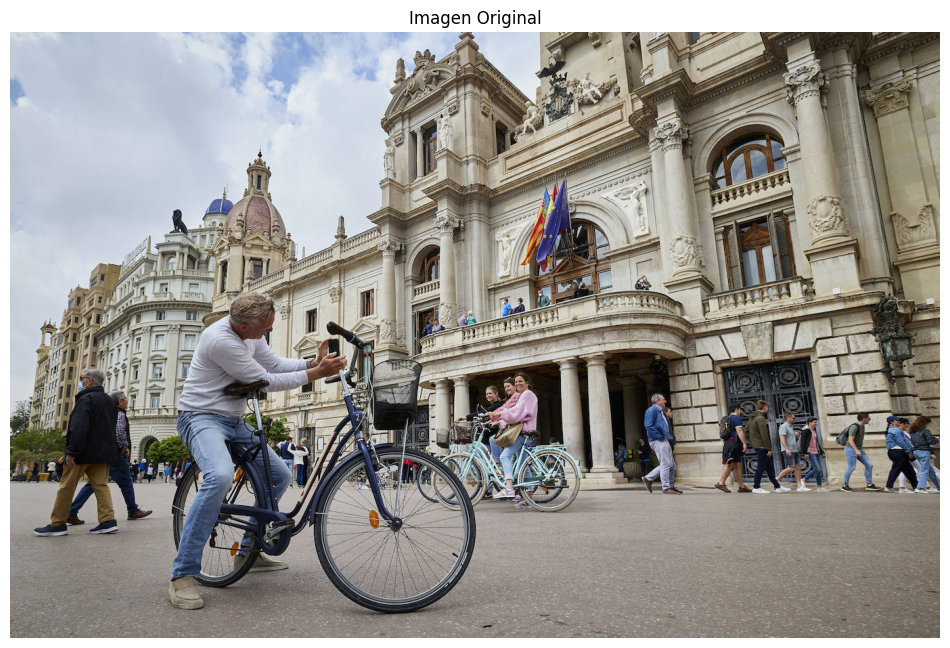

In [4]:

# Crear una imagen de ejemplo
imagen_prueba = cv2.imread("./img/mix.jpg")
# Mostrar la imagen original
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.show()




0: 448x640 14 persons, 2 bicycles, 85.6ms
Speed: 7.4ms preprocess, 85.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


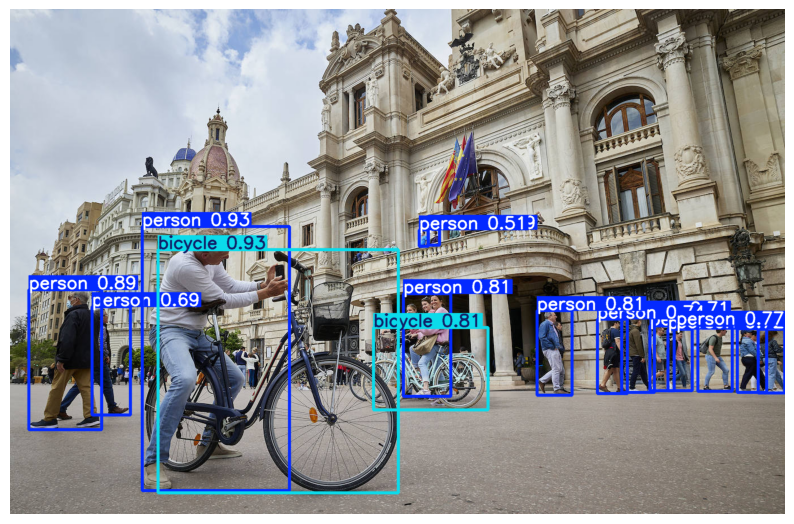

In [9]:
#Primero trabajamos dentro del notebook


import cv2
import matplotlib.pyplot as plt

# Carga la imagen desde el archivo especificado
img = cv2.imread("./img/mix.jpg")

# Ejecuta el modelo sobre la imagen para obtener predicciones
results = modelo(img)

# Genera una versión de la imagen con las detecciones dibujadas
annotated_frame = results[0].plot()

# Convertir de BGR (OpenCV) a RGB (Matplotlib)
annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Mostrar la imagen directamente en el notebook
plt.figure(figsize=(10,10))
plt.imshow(annotated_frame_rgb)
plt.axis("off")  # Oculta los ejes
plt.show()


Ejecutando detección con YOLOv11...

✓ Detección completada
Objetos detectados: 16


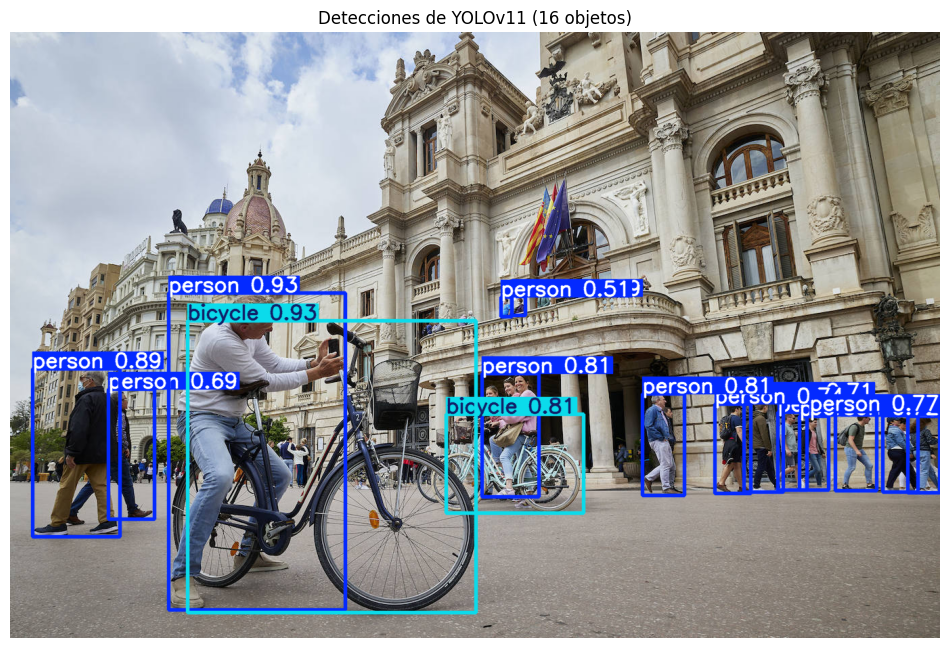


Detalles de las detecciones:

  Objeto 1:
    Clase: bicycle
    Confianza: 93.22%
    Coordenadas: x1=263, y1=426, x2=689, y2=858

  Objeto 2:
    Clase: person
    Confianza: 92.74%
    Coordenadas: x1=235, y1=385, x2=495, y2=853

  Objeto 3:
    Clase: person
    Confianza: 88.98%
    Coordenadas: x1=33, y1=497, x2=163, y2=745

  Objeto 4:
    Clase: person
    Confianza: 81.32%
    Coordenadas: x1=935, y1=534, x2=997, y2=684

  Objeto 5:
    Clase: bicycle
    Confianza: 81.18%
    Coordenadas: x1=644, y1=565, x2=847, y2=710

  Objeto 6:
    Clase: person
    Confianza: 80.65%
    Coordenadas: x1=698, y1=504, x2=781, y2=687

  Objeto 7:
    Clase: person
    Confianza: 77.35%
    Coordenadas: x1=1220, y1=561, x2=1280, y2=678

  Objeto 8:
    Clase: person
    Confianza: 73.69%
    Coordenadas: x1=1042, y1=549, x2=1095, y2=681

  Objeto 9:
    Clase: person
    Confianza: 72.48%
    Coordenadas: x1=1290, y1=567, x2=1341, y2=680

  Objeto 10:
    Clase: person
    Confianza: 72.35%


In [12]:
# Realizar la detección con YOLOv11
# El modelo procesa la imagen y devuelve las detecciones

print("Ejecutando detección con YOLOv11...")

# Realizar la predicción
# conf: umbral de confianza mínimo (0.0 a 1.0)
# iou: umbral de Intersection over Union para NMS (Non-Maximum Suppression)
resultados = modelo.predict(
    source=imagen_prueba,
    conf=0.25,  # Confianza mínima del 25%
    iou=0.45,   # IOU threshold para eliminar detecciones duplicadas
    verbose=False  # No mostrar logs detallados
)

# Obtener la primera (y única) imagen de resultados
resultado = resultados[0]

# Información sobre las detecciones
num_detecciones = len(resultado.boxes)
print(f"\n✓ Detección completada")
print(f"Objetos detectados: {num_detecciones}")

# Visualizar el resultado con las cajas dibujadas
imagen_con_detecciones = resultado.plot()  # Dibuja las cajas automáticamente

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(imagen_con_detecciones, cv2.COLOR_BGR2RGB))
plt.title(f'Detecciones de YOLOv11 ({num_detecciones} objetos)')
plt.axis('off')
plt.show()

# Mostrar detalles de cada detección
if num_detecciones > 0:
    print("\nDetalles de las detecciones:")
    for i, box in enumerate(resultado.boxes):
        clase_id = int(box.cls[0])
        clase_nombre = nombres_clases[clase_id]
        confianza = float(box.conf[0])
        coordenadas = box.xyxy[0].cpu().numpy()
        
        print(f"\n  Objeto {i+1}:")
        print(f"    Clase: {clase_nombre}")
        print(f"    Confianza: {confianza*100:.2f}%")
        print(f"    Coordenadas: x1={coordenadas[0]:.0f}, y1={coordenadas[1]:.0f}, "
              f"x2={coordenadas[2]:.0f}, y2={coordenadas[3]:.0f}")
else:
    print("\nNo se detectaron objetos con la confianza mínima establecida.")
    print("Tip: Usa una imagen real con objetos del mundo real para mejores resultados.")

In [13]:
#Pero si queremos trabajar en un script de Python para usarlo en una aplicación, debemos usar este código:

# Carga la imagen desde el archivo especificado
img = cv2.imread("./img/mix.jpg")

# Ejecuta el modelo sobre la imagen para obtener predicciones
results = modelo(img)

# Genera una versión de la imagen con las detecciones dibujadas
annotated_frame = results[0].plot()

# Muestra la imagen anotada en una ventana
cv2.imshow("Detección - Imagen", annotated_frame)

# Espera a que se presione una tecla para cerrar la ventana
cv2.waitKey(0)

# Cierra todas las ventanas abiertas por OpenCV
cv2.destroyAllWindows()


## probemos con video

In [15]:
# Abre el archivo de video indicado
cap = cv2.VideoCapture("./video/coches.mp4")

# Bucle principal: se ejecuta mientras el video esté abierto
while cap.isOpened():

    # Lee un fotograma del video
    ret, frame = cap.read()

    # Si no se pudo leer (fin del video o error), salir del bucle
    if not ret:
        break

    # Ejecuta el modelo sobre el fotograma para obtener predicciones
    results = modelo(frame)

    # Genera un fotograma anotado con las detecciones dibujadas
    annotated_frame = results[0].plot()

    # Muestra el fotograma procesado en una ventana
    cv2.imshow("Detección - Video", annotated_frame)

    # Espera una tecla; si se presiona 'q', se detiene la reproducción
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Presiona 'q' para salir
        break

# Libera el recurso del video
cap.release()

# Cierra todas las ventanas de OpenCV
cv2.destroyAllWindows()


## Detección en Webcam - Versión Básica 

Ahora vamos a usar la webcam para hacer detección en tiempo real.

### Importante:
- Asegúrate de tener una webcam conectada
- La primera ejecución puede tardar unos segundos
- Presiona **'q'** para detener la detección

### Cómo funciona:
1. Se captura cada frame de la webcam
2. YOLO procesa el frame y detecta objetos
3. Se dibujan las cajas y etiquetas
4. Se muestra el frame procesado

In [16]:
# Activa la webcam (índice 0 normalmente corresponde a la cámara principal)
cap = cv2.VideoCapture(1)

# Bucle infinito para capturar fotogramas en tiempo real
while True:

    # Captura un fotograma desde la webcam
    ret, frame = cap.read()

    # Si no se pudo capturar el fotograma, salir del bucle
    if not ret:
        break

    # Ejecuta el modelo sobre el fotograma para obtener predicciones
    results = modelo(frame)

    # Genera un fotograma anotado con las detecciones dibujadas
    annotated_frame = results[0].plot()

    # Muestra el fotograma procesado en una ventana
    cv2.imshow("Detección - Webcam", annotated_frame)

    # Si se presiona la tecla 'q', se detiene la visualización
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Presiona 'q' para salir
        break

# Libera la cámara
cap.release()

# Cierra todas las ventanas abiertas por OpenCV
cv2.destroyAllWindows()


## 5. Entendiendo los Resultados de YOLO

Cada detección de YOLO contiene:

1. **Bounding Box**: Coordenadas (x1, y1, x2, y2) del rectángulo
2. **Clase**: El tipo de objeto detectado
3. **Confianza (Confidence)**: Probabilidad de que la detección sea correcta (0-1)

### Parámetros importantes:

- **conf (confidence threshold)**: Umbral de confianza mínimo
  - Valores bajos (0.1-0.3): Más detecciones, pero más falsos positivos
  - Valores altos (0.5-0.9): Menos detecciones, pero más precisas
  
- **iou (Intersection over Union)**: Para eliminar cajas duplicadas
  - Valores típicos: 0.45 - 0.5

In [17]:
# Función auxiliar para procesar y mostrar resultados de forma personalizada

def procesar_detecciones(resultados, imagen_original):
    """
    Procesa los resultados de YOLO y dibuja las detecciones de forma personalizada
    
    Args:
        resultados: Resultados de modelo.predict()
        imagen_original: Imagen original en formato BGR
    
    Returns:
        imagen_anotada: Imagen con las detecciones dibujadas
        info_detecciones: Lista con información de cada detección
    """
    # Crear una copia de la imagen para dibujar
    imagen_anotada = imagen_original.copy()
    info_detecciones = []
    
    resultado = resultados[0]
    
    # Procesar cada detección
    for box in resultado.boxes:
        # Extraer información
        clase_id = int(box.cls[0])
        clase_nombre = nombres_clases[clase_id]
        confianza = float(box.conf[0])
        coordenadas = box.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = coordenadas
        
        # Guardar información
        info_detecciones.append({
            'clase': clase_nombre,
            'confianza': confianza,
            'bbox': (x1, y1, x2, y2)
        })
        
        # Colores diferentes según la clase (para visualización)
        color = (
            int(np.random.randint(0, 255)),
            int(np.random.randint(0, 255)),
            int(np.random.randint(0, 255))
        )
        
        # Dibujar el rectángulo
        cv2.rectangle(imagen_anotada, (x1, y1), (x2, y2), color, 2)
        
        # Preparar el texto
        texto = f"{clase_nombre} {confianza*100:.1f}%"
        
        # Calcular el tamaño del texto para el fondo
        (ancho_texto, alto_texto), baseline = cv2.getTextSize(
            texto, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
        )
        
        # Dibujar rectángulo de fondo para el texto
        cv2.rectangle(
            imagen_anotada,
            (x1, y1 - alto_texto - baseline - 5),
            (x1 + ancho_texto, y1),
            color,
            -1
        )
        
        # Dibujar el texto
        cv2.putText(
            imagen_anotada,
            texto,
            (x1, y1 - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 255, 255),
            2
        )
    
    return imagen_anotada, info_detecciones

print("✓ Función de procesamiento personalizado creada")

✓ Función de procesamiento personalizado creada


## 8. Aplicación Práctica: Contador de Personas

Vamos a crear una aplicación específica que cuenta personas en tiempo real.
Útil para:
- 🏪 Conteo de clientes en tiendas
- 🏢 Control de aforo
- 📊 Análisis de tráfico peatonal

CONTADOR DE PERSONAS EN TIEMPO REAL
Duración: 30 segundos
Umbral de confianza: 0.6

Presiona 'q' para salir

✓ Sistema iniciado
Detectando personas...


REPORTE FINAL - CONTADOR DE PERSONAS
Duración del monitoreo: 30.59 segundos
Personas detectadas (máximo simultáneo): 3
Promedio de personas: 1.59
Total de detecciones: 421
Frames analizados: 265


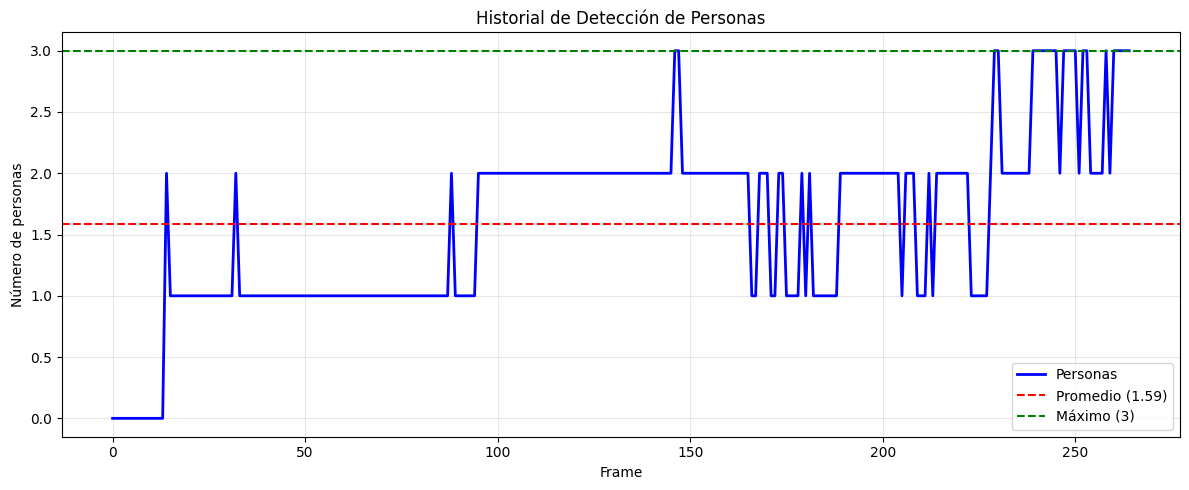

✓ Aplicación de contador de personas creada

Para ejecutar, descomenta la última línea


In [19]:
def contador_personas_tiempo_real(duracion_segundos=30, conf_threshold=0.6):
    """
    Aplicación específica para contar personas en tiempo real
    
    Args:
        duracion_segundos: Duración de la captura
        conf_threshold: Umbral de confianza (recomendado: 0.6 para personas)
    """
    print("="*60)
    print("CONTADOR DE PERSONAS EN TIEMPO REAL")
    print("="*60)
    print(f"Duración: {duracion_segundos} segundos")
    print(f"Umbral de confianza: {conf_threshold}")
    print("\nPresiona 'q' para salir\n")
    
    cap = cv2.VideoCapture(1)
    
    if not cap.isOpened():
        print("❌ Error: No se pudo abrir la webcam")
        return
    
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    ancho = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    alto = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    print("✓ Sistema iniciado")
    print("Detectando personas...\n")
    
    # Estadísticas
    tiempo_inicio = time.time()
    personas_maximas = 0
    historial_personas = []
    total_detecciones = 0
    
    try:
        while True:
            tiempo_transcurrido = time.time() - tiempo_inicio
            if tiempo_transcurrido > duracion_segundos:
                break
            
            ret, frame = cap.read()
            if not ret:
                break
            
            # Detectar
            resultados = modelo.predict(
                source=frame,
                conf=conf_threshold,
                classes=[0],  # Clase 0 = person
                verbose=False
            )
            
            resultado = resultados[0]
            frame_anotado = frame.copy()
            
            # Contar personas
            num_personas = len(resultado.boxes)
            total_detecciones += num_personas
            historial_personas.append(num_personas)
            
            if num_personas > personas_maximas:
                personas_maximas = num_personas
            
            # Dibujar cada persona
            for i, box in enumerate(resultado.boxes):
                coordenadas = box.xyxy[0].cpu().numpy().astype(int)
                x1, y1, x2, y2 = coordenadas
                confianza = float(box.conf[0])
                
                # Color según la confianza
                if confianza > 0.8:
                    color = (0, 255, 0)  # Verde - alta confianza
                elif confianza > 0.6:
                    color = (0, 255, 255)  # Amarillo - media confianza
                else:
                    color = (0, 165, 255)  # Naranja - baja confianza
                
                # Dibujar rectángulo
                cv2.rectangle(frame_anotado, (x1, y1), (x2, y2), color, 3)
                
                # Etiqueta
                texto = f"Persona {i+1} ({confianza*100:.0f}%)"
                (w_text, h_text), _ = cv2.getTextSize(
                    texto, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2
                )
                cv2.rectangle(frame_anotado, (x1, y1-h_text-10), 
                            (x1+w_text, y1), color, -1)
                cv2.putText(frame_anotado, texto, (x1, y1-5),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
            
            # Panel de información grande
            panel_ancho = 300
            panel_alto = 200
            overlay = frame_anotado.copy()
            cv2.rectangle(overlay, (ancho-panel_ancho, 0), 
                         (ancho, panel_alto), (0, 0, 0), -1)
            frame_anotado = cv2.addWeighted(overlay, 0.7, frame_anotado, 0.3, 0)
            
            # Información del contador
            y = 40
            cv2.putText(frame_anotado, "CONTADOR", (ancho-panel_ancho+10, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            
            y += 50
            # Número actual de personas (grande)
            texto_personas = f"{num_personas}"
            cv2.putText(frame_anotado, texto_personas, (ancho-panel_ancho+80, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0, 255, 0), 4)
            
            y += 50
            cv2.putText(frame_anotado, "Personas ahora", (ancho-panel_ancho+40, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
            
            y += 35
            cv2.putText(frame_anotado, f"Maximo: {personas_maximas}", 
                       (ancho-panel_ancho+10, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 1)
            
            y += 25
            promedio = np.mean(historial_personas) if historial_personas else 0
            cv2.putText(frame_anotado, f"Promedio: {promedio:.1f}", 
                       (ancho-panel_ancho+10, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 1)
            
            # Tiempo restante
            tiempo_restante = duracion_segundos - tiempo_transcurrido
            cv2.putText(frame_anotado, f"Tiempo: {tiempo_restante:.0f}s", 
                       (10, alto-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
            
            # Mostrar
            cv2.imshow('Contador de Personas - YOLOv11', frame_anotado)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    except KeyboardInterrupt:
        print("\nInterrumpido")
    
    finally:
        cap.release()
        cv2.destroyAllWindows()
        
        # Reporte final
        tiempo_total = time.time() - tiempo_inicio
        promedio_final = np.mean(historial_personas) if historial_personas else 0
        
        print("\n" + "="*60)
        print("REPORTE FINAL - CONTADOR DE PERSONAS")
        print("="*60)
        print(f"Duración del monitoreo: {tiempo_total:.2f} segundos")
        print(f"Personas detectadas (máximo simultáneo): {personas_maximas}")
        print(f"Promedio de personas: {promedio_final:.2f}")
        print(f"Total de detecciones: {total_detecciones}")
        print(f"Frames analizados: {len(historial_personas)}")
        print("="*60)
        
        # Gráfico del historial
        if historial_personas:
            plt.figure(figsize=(12, 5))
            plt.plot(historial_personas, linewidth=2, color='blue', label='Personas')
            plt.axhline(y=promedio_final, color='red', linestyle='--', 
                       label=f'Promedio ({promedio_final:.2f})')
            plt.axhline(y=personas_maximas, color='green', linestyle='--', 
                       label=f'Máximo ({personas_maximas})')
            plt.xlabel('Frame')
            plt.ylabel('Número de personas')
            plt.title('Historial de Detección de Personas')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

# Ejecutar el contador
contador_personas_tiempo_real(duracion_segundos=30, conf_threshold=0.6)

print("✓ Aplicación de contador de personas creada")
print("\nPara ejecutar, descomenta la última línea")

## 9. Proyecto: Detector de Objetos Específicos

Crea tu propio detector personalizado.
para este ejemplo vamos a contar coches 

In [20]:
# Importa la librería OpenCV para procesamiento de imágenes y video
import cv2

# Importa las soluciones de Ultralytics (como ObjectCounter)
from ultralytics import solutions

# Abre el archivo de video indicado
cap = cv2.VideoCapture('./video/coches.mp4')

# Verifica que el video se haya abierto correctamente
assert cap.isOpened(), "Error reading video file"

# cap = cv2.VideoCapture(0)  # Descomenta esta línea si deseas usar la cámara en lugar de un archivo de video

# Define los puntos que forman la región donde se realizará el conteo
# En este caso, una línea formada por dos puntos
region_points = [(218, 264), (554, 222)]

# Ejemplos alternativos para usar una región rectangular o poligonal:
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]  # rectángulo
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360), (20, 400)]  # polígono

# Obtener propiedades del video: ancho, alto y FPS
w, h, fps = (int(cap.get(x)) for x in (
    cv2.CAP_PROP_FRAME_WIDTH,
    cv2.CAP_PROP_FRAME_HEIGHT,
    cv2.CAP_PROP_FPS
))

# Crear un escritor de video para guardar el resultado procesado
video_writer = cv2.VideoWriter(
    "object_counting_output.avi",
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (w, h)
)

# Inicializar el contador de objetos
counter = solutions.ObjectCounter(
    show=True,              # Mostrar la salida procesada en pantalla
    region=region_points,   # Puntos de la región donde se contarán los objetos
    model="yolo11n.pt",     # Modelo de detección (OBB disponible opcionalmente)
    # classes=[0, 2],        # (Opcional) Contar solo clases específicas, ej.: persona y coche
    # tracker="botsort.yaml" # (Opcional) Elegir un tracker como ByteTrack o BoT-SORT
)

# Procesar el video cuadro por cuadro
while cap.isOpened():

    # Leer un fotograma del video
    success, im0 = cap.read()

    # Si no se obtuvo un fotograma, se terminó el video
    if not success:
        print("Video frame is empty or processing is complete.")
        break

    # Procesar el fotograma con el contador (detección + tracking + conteo)
    results = counter(im0)

    # print(results)  # (Opcional) Ver el resultado detallado en consola

    # Guardar el fotograma procesado en el archivo de salida
    video_writer.write(results.plot_im)

# Liberar el video original
cap.release()

# Cerrar el archivo de salida
video_writer.release()

# Cerrar todas las ventanas abiertas por OpenCV
cv2.destroyAllWindows()


requirements: Ultralytics requirement ['shapely>=2.0.0'] not found, attempting AutoUpdate...
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.7 MB/s  0:00:00

requirements: AutoUpdate success  1.9s
WARNING requirements: Restart runtime or rerun command for updates to take effect

Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': [(218, 264), (554, 222)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': T

## pero.. ¿como hago la linea?

In [ ]:
# Importa la librería OpenCV para trabajar con imágenes y video
import cv2

# Ruta del video que se usará para seleccionar puntos
video_path = './video/coches.mp4'

# Escala para mostrar el video más pequeño en pantalla (útil para pantallas pequeñas)
scale = 0.5  # Ajusta a 0.3 o 0.7 según lo necesites

# Lista donde se guardarán los puntos seleccionados
points = []

# Función que se ejecuta cuando el usuario hace clic en la ventana
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:  # Detecta clic izquierdo
        # Convertir coordenadas de la ventana escalada a las coordenadas reales del video
        x_orig = int(x / scale)
        y_orig = int(y / scale)
        points.append((x_orig, y_orig))

        # Imprime la coordenada real seleccionada
        print(f"Coordenada original: ({x_orig}, {y_orig})")

        # Si ya hay dos puntos, muestra la línea final
        if len(points) == 2:
            print(f"\nLínea lista: {points}\n")

# Abre el video para lectura
cap = cv2.VideoCapture(video_path)

# Bucle para mostrar el video y permitir seleccionar puntos
while True:
    ret, frame = cap.read()
    if not ret:  # Si no hay más fotogramas, termina
        break

    # Reduce el tamaño del fotograma según el factor de escala
    frame_resized = cv2.resize(frame, (0, 0), fx=scale, fy=scale)

    # Copia del frame donde se dibujará la línea
    clone = frame_resized.copy()

    # Si ya se seleccionaron dos puntos, dibujar la línea en la ventana escalada
    if len(points) == 2:
        pt1 = (int(points[0][0] * scale), int(points[0][1] * scale))
        pt2 = (int(points[1][0] * scale), int(points[1][1] * scale))
        cv2.line(clone, pt1, pt2, (0, 255, 0), 2)  # Línea verde

    # Mostrar la ventana con el video
    cv2.imshow("Haz clic en dos puntos para definir la línea", clone)

    # Registrar el callback para capturar clics del usuario
    cv2.setMouseCallback("Haz clic en dos puntos para definir la línea", click_event)

    # Salir si el usuario presiona 'q' o ya seleccionó 2 puntos
    key = cv2.waitKey(20)
    if key == ord('q') or len(points) == 2:
        break

# Liberar el video
cap.release()

# Cerrar ventanas abiertas
cv2.destroyAllWindows()

# Mostrar el resultado final en consola
if len(points) == 2:
    print(f"Usa esta línea en tu código:\nregion_points = {points}")
else:
    print("No seleccionaste dos puntos.")


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2552: error: (-27:Null pointer) NULL window: 'Haz clic en dos puntos para definir la línea' in function 'cvSetMouseCallback'


: 

## 11. Optimización y Consejos

### Para mejorar el rendimiento:

1. **Usa el modelo más pequeño necesario**
   - YOLOv11n para velocidad
   - YOLOv11s o m para balance
   - YOLOv11l o x solo si necesitas máxima precisión

2. **Reduce la resolución de la webcam**
   ```python
   cap.set(cv2.CAP_PROP_FRAME_WIDTH, 416)
   cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 416)
   ```

3. **Ajusta el umbral de confianza**
   - Valores más altos = menos detecciones pero más precisas
   - Experimenta con valores entre 0.3 y 0.7

4. **Procesa cada N frames**
   - No es necesario detectar en TODOS los frames
   - Procesa cada 2 o 3 frames para ahorrar procesamiento

5. **Usa GPU si está disponible**
   - YOLO detectará automáticamente CUDA si tienes una GPU NVIDIA
   - Puede aumentar la velocidad 5-10x

### Solución de problemas comunes:

| Problema | Solución |
|----------|----------|
| FPS muy bajos | Usa modelo más pequeño o reduce resolución |
| Muchos falsos positivos | Aumenta el umbral de confianza |
| No detecta objetos pequeños | Aumenta la resolución o usa modelo más grande |
| Webcam no se abre | Verifica que no esté en uso por otra app |
| Detecciones inestables | Implementa tracking o suavizado temporal |

## 12. Proyecto Final: Sistema Completo de Vigilancia

Combina todo lo aprendido en un sistema completo.

In [5]:
# Importamos el módulo datetime, que permite manejar fechas y horas (útil para registrar eventos)
import datetime


# --------------------------------------------------------
# FUNCIÓN PRINCIPAL DEL SISTEMA DE VIGILANCIA
# --------------------------------------------------------
def sistema_vigilancia_completo(
    duracion_minutos=5,            # Duración total del sistema antes de apagarse automáticamente
    guardar_eventos=True,          # Si TRUE, se guardarán videos cuando haya detecciones
    clases_vigilar=['person'],     # Lista de clases a detectar (según el modelo YOLO)
    conf_threshold=0.6             # Nivel mínimo de confianza para considerar válida una detección
):
    """
    Sistema completo de vigilancia conectado a YOLOv11.

    Este sistema realiza:
    - Captura continua desde webcam
    - Detección en tiempo real
    - Dibujo de cuadros y etiquetas sobre la imagen
    - Registro automático de eventos con hora
    - Grabación cuando aparece un objeto vigilado
    - Estadísticas en vivo en la pantalla
    - Reporte final de todo lo detectado
    """

    # --------------------------------------------------------
    # MUESTRA INFORMACIÓN INICIAL ANTES DE EMPEZAR
    # --------------------------------------------------------
    print("="*70)
    print("SISTEMA DE VIGILANCIA INTELIGENTE - YOLOv11")
    print("="*70)
    print(f"Duración: {duracion_minutos} minutos")                 # Tiempo total de monitoreo
    print(f"Vigilando: {', '.join(clases_vigilar)}")               # Clases de objetos que se detectarán
    print(f"Umbral de confianza: {conf_threshold}")                # Nivel requerido para aceptación
    print("\nPresiona 'q' para detener\n")
    

    # --------------------------------------------------------
    # CONFIGURACIÓN DE LA WEBCAM
    # --------------------------------------------------------
    cap = cv2.VideoCapture(0)   # 0 = webcam principal
    if not cap.isOpened():      # Verifica que la cámara esté disponible
        print("❌ Error: No se pudo abrir la webcam")
        return
    
    # Establecemos una resolución estándar (puedes modificar si quieres calidad HD)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)  
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

    # Guardamos los valores reales (en caso el sistema no acepte la resolución pedida)
    ancho = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    alto = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    

    # --------------------------------------------------------
    # VARIABLES PARA CONTROL INTERNO DEL SISTEMA
    # --------------------------------------------------------
    tiempo_inicio = time.time()                 # Momento en que inicia el sistema
    duracion_segundos = duracion_minutos * 60   # Convertimos minutos → segundos

    eventos = []                                # Lista para guardar todos los eventos detectados
    grabando = False                            # Indica si estamos grabando video o no
    writer = None                                # Objeto VideoWriter (cuando se graba)
    contador_eventos = 0                         # Cantidad total de eventos detectados

    print("✓ Sistema de vigilancia activado")
    print("Monitoreando...\n")
    

    # --------------------------------------------------------
    # BUCLE PRINCIPAL DE VIGILANCIA
    # --------------------------------------------------------
    try:
        while True:

            # Calculamos cuánto tiempo ha transcurrido desde el inicio
            tiempo_actual = time.time()
            tiempo_transcurrido = tiempo_actual - tiempo_inicio

            # Si ya se cumplió el tiempo total → terminar
            if tiempo_transcurrido > duracion_segundos:
                break

            # Capturamos un fotograma de la webcam
            ret, frame = cap.read()
            if not ret:
                break   # Si falla la captura, se detiene el sistema

            
            # --------------------------------------------------------
            # PROCESAMOS EL FRAME CON YOLO
            # --------------------------------------------------------
            resultados = modelo.predict(
                source=frame,       # Imagen a procesar
                conf=conf_threshold,# Probabilidad mínima
                verbose=False       # Oculta logs
            )
            
            resultado = resultados[0]       # YOLO devuelve varias cosas, aquí tomamos el primer frame
            frame_anotado = frame.copy()    # Duplicamos el frame para dibujar sobre él


            # --------------------------------------------------------
            # ANALIZAMOS LAS DETECCIONES REALIZADAS POR YOLO
            # --------------------------------------------------------
            objetos_detectados = []         # Lista para este frame

            for box in resultado.boxes:     # Recorremos cada detección encontrada
                
                clase_id = int(box.cls[0])          # ID numérico de la clase detectada
                clase_nombre = nombres_clases[clase_id]  # Convertimos ID → nombre (ej. 'person')
                
                # Solo nos interesa si coincide con la lista de vigilancia
                if clase_nombre in clases_vigilar:

                    objetos_detectados.append(clase_nombre)

                    # Confianza de detección (entre 0 y 1)
                    confianza = float(box.conf[0])

                    # Coordenadas del cuadro delimitador
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                    
                    # Dibujar el cuadro ROJO alrededor del objeto
                    cv2.rectangle(frame_anotado, (x1, y1), (x2, y2), (0, 0, 255), 2)

                    # Dibujar etiqueta con nombre y porcentaje de confianza
                    cv2.putText(
                        frame_anotado,
                        f"{clase_nombre} {confianza*100:.0f}%",
                        (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (0, 0, 255),
                        2
                    )


            # --------------------------------------------------------
            # MANEJO DE EVENTOS (INICIO Y FIN DE GRABACIÓN)
            # --------------------------------------------------------

            # Si detectamos objetos Y no estamos grabando todavía → iniciamos grabación
            if objetos_detectados and not grabando:

                contador_eventos += 1   # Aumentamos el número de evento
                
                timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
                nombre_archivo = f"evento_{contador_eventos}_{timestamp}.mp4"

                # Si guardamos los eventos → abrir archivo de video
                if guardar_eventos:
                    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Códec de video
                    writer = cv2.VideoWriter(nombre_archivo, fourcc, 20, (ancho, alto))

                # Guardamos la información del evento
                evento = {
                    'numero': contador_eventos,
                    'timestamp': datetime.datetime.now(),
                    'objetos': list(set(objetos_detectados)),
                    'archivo': nombre_archivo if guardar_eventos else None
                }
                eventos.append(evento)

                grabando = True

                # Mostrar alerta en consola
                print(f"⚠️  EVENTO {contador_eventos}: {', '.join(set(objetos_detectados))} detectado a las {evento['timestamp'].strftime('%H:%M:%S')}")


            # Si NO hay detecciones y SÍ está grabando → detener grabación
            elif not objetos_detectados and grabando:
                if writer:
                    writer.release()   # Cerramos archivo de video
                    writer = None
                grabando = False


            # Si grabando, guardar el frame actual en el video
            if grabando and writer:
                writer.write(frame_anotado)


            # --------------------------------------------------------
            # INTERFAZ GRÁFICA (HUD EN LA PARTE SUPERIOR)
            # --------------------------------------------------------

            # Creamos fondo oscuro semitransparente
            overlay = frame_anotado.copy()
            cv2.rectangle(overlay, (0, 0), (ancho, 100), (0, 0, 0), -1)
            frame_anotado = cv2.addWeighted(overlay, 0.7, frame_anotado, 0.3, 0)
            
            # Texto del estado actual (MONITOREANDO / GRABANDO)
            estado = "GRABANDO" if grabando else "MONITOREANDO"
            color_estado = (0, 0, 255) if grabando else (0, 255, 0)
            cv2.putText(frame_anotado, estado, (10, 35),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, color_estado, 2)
            
            # Hora actual del sistema
            hora_actual = datetime.datetime.now().strftime("%H:%M:%S")
            cv2.putText(frame_anotado, hora_actual, (10, 70),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            
            # Cantidad de eventos detectados hasta el momento
            cv2.putText(frame_anotado, f"Eventos: {contador_eventos}", (ancho-180, 35),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            
            # Número de objetos detectados en este frame
            if objetos_detectados:
                cv2.putText(frame_anotado, f"Detectados: {len(objetos_detectados)}",
                            (ancho-180, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
            
            # Mostrar frame con HUD y anotaciones
            cv2.imshow('Sistema de Vigilancia - YOLOv11', frame_anotado)
            
            # Permitir salir manualmente
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    

    # Capturamos interrupción manual (Ctrl + C)
    except KeyboardInterrupt:
        print("\nSistema detenido manualmente.")
    

    # --------------------------------------------------------
    # LIBERAR RECURSOS + REPORTE FINAL
    # --------------------------------------------------------
    finally:
        if writer:
            writer.release()
        cap.release()
        cv2.destroyAllWindows()
        

        # ------------------------
        # MOSTRAR REPORTE FINAL
        # ------------------------
        print("\n" + "="*70)
        print("REPORTE DE VIGILANCIA")
        print("="*70)
        print(f"Duración del monitoreo: {tiempo_transcurrido/60:.2f} minutos")
        print(f"Total de eventos detectados: {contador_eventos}")
        
        # Mostrar detalles de cada evento encontrado
        if eventos:
            print("\nDetalle de eventos:")
            for evento in eventos:
                print(f"\n  Evento #{evento['numero']}")
                print(f"    Hora: {evento['timestamp'].strftime('%H:%M:%S')}")
                print(f"    Objetos: {', '.join(evento['objetos'])}")
                if evento['archivo']:
                    print(f"    Archivo: {evento['archivo']}")
        else:
            print("\nNo se detectaron eventos durante el monitoreo.")
        
        print("\n" + "="*70)
        print("Monitoreo finalizado")
        print("="*70)



# --------------------------------------------------------
# EJECUCIÓN DEL SISTEMA
# --------------------------------------------------------
sistema_vigilancia_completo(
     duracion_minutos=5,             # Tiempo de vigilancia
     guardar_eventos=True,           # Guardar videos cuando haya detecciones
     clases_vigilar=['person'],      # Detectar personas
     conf_threshold=0.6              # Nivel de confianza mínimo
)

print("✓ Sistema de vigilancia completo creado")
print("\nPara ejecutar, descomenta el código de ejemplo")


SISTEMA DE VIGILANCIA INTELIGENTE - YOLOv11
Duración: 5 minutos
Vigilando: person
Umbral de confianza: 0.6

Presiona 'q' para detener

✓ Sistema de vigilancia activado
Monitoreando...

⚠️  EVENTO 1: person detectado a las 13:19:47
⚠️  EVENTO 2: person detectado a las 13:19:58
⚠️  EVENTO 3: person detectado a las 13:19:59
⚠️  EVENTO 4: person detectado a las 13:20:01
⚠️  EVENTO 5: person detectado a las 13:20:04
⚠️  EVENTO 6: person detectado a las 13:20:14
⚠️  EVENTO 7: person detectado a las 13:20:14
⚠️  EVENTO 8: person detectado a las 13:20:32

REPORTE DE VIGILANCIA
Duración del monitoreo: 0.83 minutos
Total de eventos detectados: 8

Detalle de eventos:

  Evento #1
    Hora: 13:19:47
    Objetos: person
    Archivo: evento_1_20251117_131947.mp4

  Evento #2
    Hora: 13:19:58
    Objetos: person
    Archivo: evento_2_20251117_131958.mp4

  Evento #3
    Hora: 13:19:59
    Objetos: person
    Archivo: evento_3_20251117_131959.mp4

  Evento #4
    Hora: 13:20:01
    Objetos: person
 

## Conclusiones y Próximos Pasos


Has aprendido a:
-  Instalar y configurar YOLOv11
-  Realizar detección en imágenes estáticas
-  Implementar detección en tiempo real con webcam
-  Crear aplicaciones personalizadas
-  Construir un sistema de vigilancia completo
-  Optimizar el rendimiento
-  Analizar y visualizar resultados

### Proyectos que puedes crear:

1. **Sistema de Asistencia Automática**
   - Detecta personas en un aula
   - Registra asistencia automáticamente

2. **Monitor de Distanciamiento Social**
   - Detecta personas
   - Calcula distancias entre ellas
   - Alerta si están muy cerca

3. **Contador de Aforo**
   - Cuenta personas que entran/salen
   - Controla capacidad máxima

4. **Sistema Anti-Robo**
   - Detecta movimiento
   - Envía alertas
   - Graba automáticamente

5. **Asistente para Personas con Discapacidad Visual**
   - Detecta objetos
   - Proporciona retroalimentación por voz

### Recursos para seguir aprendiendo:

-  [Documentación Ultralytics YOLOv11](https://docs.ultralytics.com/)
-  [Canal de YouTube Ultralytics](https://www.youtube.com/@Ultralytics)
-  [Repositorio GitHub](https://github.com/ultralytics/ultralytics)
-  [Roboflow Universe](https://universe.roboflow.com/) - Datasets públicos


### Siguientes niveles:

1. **Entrenar tu propio modelo**
   - Crear tu dataset personalizado
   - Fine-tuning de YOLO
   - Detectar objetos específicos de tu proyecto

2. **Tracking de objetos**
   - Seguir objetos a través de frames
   - Contar objetos que cruzan líneas
   - Análisis de trayectorias

3. **Segmentación de instancias**
   - YOLOv11 también soporta segmentación
   - Obtener máscaras precisas de objetos

4. **Despliegue en producción**
   - Optimización para edge devices
   - Conversión a TensorRT, ONNX
   - Implementación en Raspberry Pi, Jetson Nano

---

**Ahora es tu turno de crear proyectos increíbles con YOLOv11!**